In [222]:
# import library
import pandas as pd
import glob
from importlib import reload
import natsort 
reload(natsort)
from natsort import natsorted
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

# read 5day step csv file 
csv_path = glob.glob(r"C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\*.csv")
#csv_path = glob.glob(r"/Users/moritakayuki/Desktop/2022/*.csv")
sorted_files = natsorted(csv_path)
for temp in sorted_files:
    print(temp)
    
#欠損日を含む2021年のSentinel-2データ取得日
year =['2021/']
day_2021= ['2/23','2/28','3/5',
           '3/10','3/15','3/20','3/25','3/30','4/4','4/9','4/14','4/19','4/24','4/29','5/4',
           '5/9','5/14','5/19','5/24','5/29','6/3','6/8','6/13','6/18','6/23','6/28','7/3',
           '7/8','7/13','7/18','7/23','7/28','8/2','8/7','8/12','8/17','8/22','8/27','9/1',
           '9/6','9/11','9/16','9/21','9/26','10/1','10/6','10/11']
ymd_date_2021 = [year[0] + d for d in day_2021]

#2021年のSentinel-2データ取得日
year =['2021/']
day= ['2/23','2/28','3/5','3/10','3/15','3/20','3/25','3/30','4/4','4/9',
      '4/14','4/19','4/24','4/29','5/4','5/9','5/14','5/19','5/24','5/29','6/3','6/8','6/13',
      '6/18','6/23','6/28','7/3','7/8','7/13','7/18','7/23','7/28','8/2','8/7','8/12','8/17',
      '8/22','8/27','9/1','9/6','9/11','9/16','9/21','9/26','10/1','10/6','10/11']
ymd_date = [year[0] + d for d in day]

# 対象期間の絞り込み（テストサイトの移植日は早くても2021/4/15）
# 2021/3/20 cloud = medium
# 2021/4/14 cloud = 0%
year =['2021/']
DOI = ['4/14','4/19', '4/24','4/29','5/4','5/9',
       '5/14','5/19','5/24','5/29','6/3','6/8','6/13','6/18', '6/23','6/28','7/3',
       '7/8','7/13','7/18','7/23','7/28','8/2','8/7','8/12','8/17','8/22','8/27',
       '9/1', '9/6','9/11','9/16','9/21','9/26'] 
doi_date_2021 = [year[0] + d for d in DOI]
# 2021/09/26
# 2021/10/11 

# read index 
output_list = []
output_colums = list(range(1, 138025))
for input_file in sorted_files:
    input_df = pd.read_csv(input_file, encoding="utf-8-sig", skiprows=1, nrows=138024, usecols=[21], header=None)
    input_list = input_df.to_numpy().tolist()
    output_row = list(itertools.chain.from_iterable(input_list))
    output_list.append(output_row)

# NDVI timeseries dataframe
output_df = pd.DataFrame(output_list, columns=output_colums, index=ymd_date, dtype=np.float64)
output_df_trans = output_df.T
#output_df_trans.head()

# Reindex to include NaN for missing dates in 2022
output_df_2021 = output_df.reindex(index=ymd_date_2021)
output_df_2021.replace("           nan", np.nan, inplace=True)
output_df_2021_t = output_df_2021.T

# save
output_df_2021.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_timeseries_all.csv")
output_df_2021_t.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_timeseries_all_t.csv")

# doy
doy_2021 = output_df_2021_t[doi_date_2021]
doy_2021_t = doy_2021.T

# save
doy_2021_t.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_timeseries_doi.csv")
doy_2021.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_timeseries_doi_t.csv")

# Savitzy Golay filter
a_int = doy_2021_t.interpolate()
a_int.replace(np.nan, "NaN")
b = a_int.dropna(axis=1)
df_sg = pd.DataFrame(index=b.index)
window_length = 13  
polyorder = 4
filtered = {}
columns = list(b.columns)

for i in range(126850):   #112324
    df_sg[columns[i]] = ss.savgol_filter(b[columns[i]], window_length=window_length, polyorder=polyorder)

df_sg.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_timeseries_sg_t.csv")

C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210223_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210228_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210305_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210310_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210315_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210320_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210325_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210329_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210404_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210409_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210414_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2021\20210419_parcel.csv
C:\U

C:\Users\HONGO-23\AppData\Local\Temp\ipykernel_21380\1453983460.py:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sg[columns[i]] = ss.savgol_filter(b[columns[i]], window_length=window_length, polyorder=polyorder)


In [220]:
path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_timeseries_sg_t.csv"
df_sg= pd.read_csv(path, index_col=0)
df_sg.head()

,1,2,3,4,5,7,8,9,10,11,...,138015,138016,138017,138018,138019,138020,138021,138022,138023,138024
2021/3/20,0.253825,0.255600,0.268944,0.248646,0.238456,0.288179,0.364300,0.366196,0.252097,0.247581,...,0.248911,0.239093,0.250618,0.270756,0.380340,0.516613,0.401703,0.355164,0.303262,0.262794
2021/3/25,0.282873,0.275427,0.287160,0.281174,0.267863,0.294985,0.346636,0.360993,0.278706,0.273979,...,0.217539,0.277012,0.211046,0.228642,0.307036,0.386967,0.294564,0.256284,0.243885,0.226371
2021/3/30,0.269585,0.262083,0.269053,0.273467,0.257024,0.278430,0.305980,0.322515,0.264437,0.265990,...,0.201093,0.281172,0.197339,0.211203,0.270774,0.312352,0.248219,0.220738,0.212659,0.200883
2021/4/4,0.234386,0.231973,0.233206,0.242725,0.223426,0.248135,0.255129,0.268117,0.227378,0.238903,...,0.193957,0.263814,0.197915,0.206993,0.254930,0.275140,0.239969,0.224882,0.201241,0.185018
2021/4/9,0.193587,0.198241,0.194429,0.203180,0.181599,0.212546,0.204621,0.211980,0.182515,0.205277,...,0.191984,0.235687,0.204059,0.207462,0.246954,0.260981,0.251582,0.249484,0.202586,0.177402


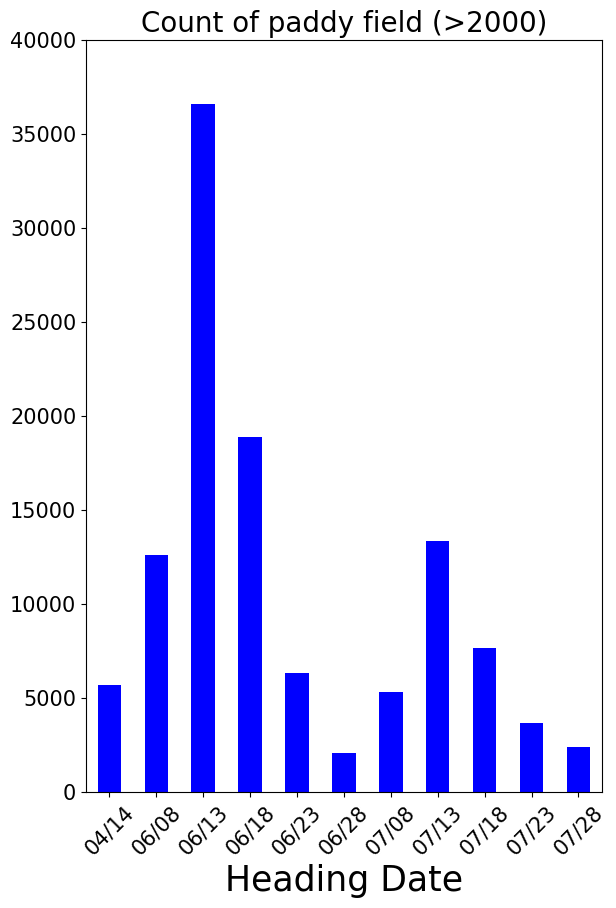

In [251]:
# NDVI maxdate
columns = list(df_sg.columns)
max_index = df_sg.idxmax()
df = pd.DataFrame(max_index,columns=['Max_Date'])
df.index.name = 'OBJECTID'
#df.to_csv("/Users/moritakayuki/Desktop/jupyter_notebook/NDVI.csv")
df.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_heading_date_414-926.csv")

#count ndvi max date
# 日付型に変換
df['Max_Date'] = pd.to_datetime(df['Max_Date'])

# 2022/3/20から2022/10/11までの日付を範囲としてカウント
date_range = pd.date_range(start='2021/4/14', end='2021/9/26', freq='D')
counts = df['Max_Date'].value_counts().reindex(date_range, fill_value=0)

# カウントがある日付のみを取得
valid_dates = counts[counts > 2000]

# 月日の形式に変換
valid_dates.index = valid_dates.index.strftime('%m/%d')

# 棒グラフをプロット
plt.figure(figsize=(6, 9))
valid_dates.plot(kind='bar', color='blue')
plt.title('Count of paddy field (>2000)', fontsize = 20)
plt.xlabel('Heading Date', fontsize = 25)
#plt.ylabel('Count', fontsize = 25)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0,40000)
plt.tick_params(labelsize=15)
#plt.savefig(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\fig\2021_count_heading.jpeg", dpi=200)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルのパス
up_path = r"C:\Users\HONGO-23\Desktop\data\03_Shp\up.csv"
mid_path = r"C:\Users\HONGO-23\Desktop\data\03_Shp\mid.csv"
down_path = r"C:\Users\HONGO-23\Desktop\data\03_Shp\down.csv"
head_path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_heading_date_414-926.csv"

# データの読み込み
df_up = pd.read_csv(up_path)
df_mid = pd.read_csv(mid_path)
df_down = pd.read_csv(down_path)
df_head = pd.read_csv(head_path)

# 日付型に変換
df_head['Max_Date'] = pd.to_datetime(df_head['Max_Date'])

# 2021/4/14から2021/9/26までの日付を範囲としてカウント
date_range = pd.date_range(start='2021/4/14', end='2021/9/26', freq='D')
counts = df_head['Max_Date'].value_counts().reindex(date_range, fill_value=0)

# カウントが2000以上の日付のみを取得
valid_dates = counts[counts > 0]

# 'OBJECTID'列の一致をフィルタリング
common_up_ids = df_head[df_head['OBJECTID'].isin(df_up['UP'])]
common_mid_ids = df_head[df_head['OBJECTID'].isin(df_mid['MIDDLE'])]
common_down_ids = df_head[df_head['OBJECTID'].isin(df_down['DOWN'])]

# 一致した 'Max_Date' のみのカウントを取得
common_up_counts = common_up_ids['Max_Date'].value_counts().reindex(date_range, fill_value=0)
common_mid_counts = common_mid_ids['Max_Date'].value_counts().reindex(date_range, fill_value=0)
common_down_counts = common_down_ids['Max_Date'].value_counts().reindex(date_range, fill_value=0)

# 月日の形式に変換
valid_dates.index = valid_dates.index.strftime('%m/%d')
common_up_counts.index = common_up_counts.index.strftime('%m/%d')
common_mid_counts.index = common_mid_counts.index.strftime('%m/%d')
common_down_counts.index = common_down_counts.index.strftime('%m/%d')

# プロットの準備
fig, ax = plt.subplots(figsize=(10, 12))

# 全体の棒グラフをプロット
valid_dates.plot(kind='bar', ax=ax, color='gray', label='All')

# 一致した部分の棒グラフをプロット
common_up_counts[common_up_counts > 0].plot(kind='bar', ax=ax, color='blue', label='UP Matched')
common_mid_counts[common_mid_counts > 0].plot(kind='bar', ax=ax, color='green', label='MID Matched')
common_down_counts[common_down_counts > 0].plot(kind='bar', ax=ax, color='purple', label='DOWN Matched')

# プロットの詳細設定
plt.title('Count of Paddy Field (>3000)', fontsize=20)
plt.xlabel('Heading Date', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.xticks(rotation=45)
plt.ylim(0, 40000)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15)
plt.tight_layout()

In [48]:
year =['2021/']
DOI = ['3/20','3/25','3/30','4/4','4/9','4/14','4/19',
           '4/24','4/29','5/4','5/9','5/14','5/19','5/24','5/29','6/3','6/8','6/13','6/18',
           '6/23','6/28','7/3','7/8','7/13','7/18','7/23','7/28','8/2','8/7','8/12','8/17',
           '8/22','8/27','9/1', '9/6','9/11','9/16','9/21','9/26']
doi_date_2021 = [year[0] + d for d in DOI]

In [72]:
import csv
# 既存のCSVファイルを読み込む
input_file_path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_heading_date.csv"
output_file_path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_ndvi_max_date_updated.csv"

with open(input_file_path, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

# ヘッダーリストを作成し、初期化
min_length = max(len(data[0]), len(doi_date_2021) + 2)
header = [""] * min_length

# 0列目と1列目にヘッダーを書き込む
header[0] = "OBJECTID"
header[1] = "max date"

# 2列飛ばしてヘッダーを書き込む
for i, value in enumerate(doi_date_2021):
    header[i + 2] = value

# ヘッダーをデータに反映
data[0] = header

# 修正したデータを新しいCSVファイルに書き込む
with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

#日付けだけのファイルを読み込む
df_m = pd.read_csv(output_file_path)
df_m
#df_m.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_timeseries_nodate.csv")

In [187]:
import pandas as pd
from datetime import datetime

# 日付差分を計算する関数を定義
def calculate_date_difference(date1_str, date2_str):
    date_format = "%Y/%m/%d"
    date1 = datetime.strptime(date1_str, date_format)
    date2 = datetime.strptime(date2_str, date_format)
    return (date2 - date1).days

for col in doi_date_2021:
    df_m[col] = df_m['max date'].apply(lambda x: calculate_date_difference(x, col))

# 出穂日からの経過日数だけのデータフレームに整序
df_dif = df_m[doi_date_2021]
#df_dif.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_dif_from_heading_date.csv")
df_dif

,2021/3/20,2021/3/25,2021/3/30,2021/4/4,2021/4/9,2021/4/14,2021/4/19,2021/4/24,2021/4/29,2021/5/4,...,2021/8/12,2021/8/17,2021/8/22,2021/8/27,2021/9/1,2021/9/6,2021/9/11,2021/9/16,2021/9/21,2021/9/26
0,-85,-80,-75,-70,-65,-60,-55,-50,-45,-40,...,60,65,70,75,80,85,90,95,100,105
1,-90,-85,-80,-75,-70,-65,-60,-55,-50,-45,...,55,60,65,70,75,80,85,90,95,100
2,-90,-85,-80,-75,-70,-65,-60,-55,-50,-45,...,55,60,65,70,75,80,85,90,95,100
3,-85,-80,-75,-70,-65,-60,-55,-50,-45,-40,...,60,65,70,75,80,85,90,95,100,105
4,-85,-80,-75,-70,-65,-60,-55,-50,-45,-40,...,60,65,70,75,80,85,90,95,100,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112319,-90,-85,-80,-75,-70,-65,-60,-55,-50,-45,...,55,60,65,70,75,80,85,90,95,100
112320,-90,-85,-80,-75,-70,-65,-60,-55,-50,-45,...,55,60,65,70,75,80,85,90,95,100
112321,-85,-80,-75,-70,-65,-60,-55,-50,-45,-40,...,60,65,70,75,80,85,90,95,100,105
112322,-190,-185,-180,-175,-170,-165,-160,-155,-150,-145,...,-45,-40,-35,-30,-25,-20,-15,-10,-5,0


In [179]:
#生育ステージ分類定義式
def growth_classify(n):
    n = int(n)
    if 56 <= n:
        return 9
    elif  41 <= n <=  55:
        return 8
    elif  21 <= n <=  40:
        return 7
    elif   1 <= n <=  20:
        return 6
    elif -19 <= n <=   0:
        return 5
    elif -54 <= n <= -20:
        return 4
    elif -74 <= n <= -55:
        return 3
    elif -84 <= n <= -75:
        return 2
    elif n <= -85:
        return 1

In [200]:
df_growth_stage = df_dif.applymap(growth_classify)
#df_growth_stage.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_growth_stage.csv")
df_growth_stage

,2021/3/20,2021/3/25,2021/3/30,2021/4/4,2021/4/9,2021/4/14,2021/4/19,2021/4/24,2021/4/29,2021/5/4,...,2021/8/12,2021/8/17,2021/8/22,2021/8/27,2021/9/1,2021/9/6,2021/9/11,2021/9/16,2021/9/21,2021/9/26
0,1,2,2,3,3,3,3,4,4,4,...,9,9,9,9,9,9,9,9,9,9
1,1,1,2,2,3,3,3,3,4,4,...,8,9,9,9,9,9,9,9,9,9
2,1,1,2,2,3,3,3,3,4,4,...,8,9,9,9,9,9,9,9,9,9
3,1,2,2,3,3,3,3,4,4,4,...,9,9,9,9,9,9,9,9,9,9
4,1,2,2,3,3,3,3,4,4,4,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112319,1,1,2,2,3,3,3,3,4,4,...,8,9,9,9,9,9,9,9,9,9
112320,1,1,2,2,3,3,3,3,4,4,...,8,9,9,9,9,9,9,9,9,9
112321,1,2,2,3,3,3,3,4,4,4,...,9,9,9,9,9,9,9,9,9,9
112322,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,5,5,5,5


In [181]:
# 栽培必要水量算出の定義式
def water_req(n):
    if 56 <= n:
        return 0
    elif  41 <= n <=  55:
        return 0
    elif  21 <= n <=  40:
        return 0.9
    elif   1 <= n <=  20:
        return 1.0
    elif -19 <= n <=   0:
        return 0.9
    elif -54 <= n <= -20:
        return 0.75
    elif -74 <= n <= -55:
        return 0.4
    elif -84 <= n <= -75:
        return 1.5
    elif n <= -85:
        return 0

In [182]:
df_water_requirement = df_dif.applymap(water_req)
df_water_requirement["OBJECTID"] = df_m["OBJECTID"]
df_water_requirement
df_water_requirement.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_timeseries_water_req.csv")
#df_water_requirement

In [183]:
# 圃場情報
path_area = r"C:\Users\HONGO-23\Desktop\data\03_Shp\All_Area_Polygon/all_area_poly_20240218.csv"
area = pd.read_csv(path_area)
df_water_obj = pd.merge(df_water_requirement, area)
#df_water_obj

In [211]:
update_df_water = df_water_obj[["OBJECTID", "Shape_Area"] + doi_date_2021].copy()
#haを平方メートルに変換
update_df_water["Shape_Area"] = update_df_water["Shape_Area"]/10000
update_df_water

#1列目の値を取得する
shape_area = update_df_water.iloc[:, 1]
# 2列目から40列目の各列に対して、1列目の値を乗算
for i in range(2, 41):
    update_df_water.iloc[:, i] *= shape_area
update_df_water
#update_df_water.to_csv("/Users/moritakayuki/Desktop/jupyter_notebook/water_requirement_paddy_rice.csv")

#shape areaを除く
df_wr_update = update_df_water[["OBJECTID"] + doi_date_2021]
df_wr_t = df_wr_update.T

# 最初の行を新しいヘッダーとして設定し、最初の行を削除
new_header = df_wr_t.iloc[0]  # 0行目を新しいヘッダーに設定
df_wr_t = df_wr_t[1:]  # 最初の行を削除
df_wr_t.columns = new_header  # 新しいヘッダーを設定
# ヘッダーを整数として設定
df_wr_t.columns = df_wr_t.columns.astype(int)
wr = df_wr_t.T
#wr

In [212]:
def append_sum_row_label(df):
    df.loc['Total'] = df.sum(numeric_only=True)
    return df

In [213]:
import numpy as np

#上流域
up_path = r"C:\Users\HONGO-23\Desktop\data\03_Shp\up.csv"
up = pd.read_csv(up_path)
up['OBJECTID'] = up['UP'].fillna(0).astype(np.int64)
df_req_up = pd.merge(up, update_df_water)
df_req_up
#shape areaを除く
df_wr_update = df_req_up[doi_date_2021]
df_wr_update
#可視化
df_up_final = append_sum_row_label(df_wr_update.copy())
df_up_final = df_up_final.T
df_up_final['Total'] = df_up_final['Total'].fillna(0).astype(np.int64)
df_up_final

,0,1,2,3,4,5,6,7,8,9,...,44233,44234,44235,44236,44237,44238,44239,44240,44241,Total
2021/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,797
2021/3/25,0.018838,0.016606,0.000000,0.020555,0.012456,0.020085,0.000000,0.000000,0.000000,0.000000,...,0.055190,0.052060,0.000000,0.000000,0.000000,0.000000,0.020887,0.000000,0.000000,1285
2021/3/30,0.018838,0.016606,0.038816,0.020555,0.012456,0.020085,0.085693,0.025296,0.055876,0.014509,...,0.055190,0.052060,0.068781,0.091532,0.085205,0.048923,0.020887,0.000000,0.000000,1125
2021/4/4,0.005024,0.004428,0.038816,0.005481,0.003322,0.005356,0.085693,0.025296,0.055876,0.014509,...,0.014717,0.013883,0.068781,0.091532,0.085205,0.048923,0.005570,0.000000,0.000000,877
2021/4/9,0.005024,0.004428,0.010351,0.005481,0.003322,0.005356,0.022852,0.006746,0.014900,0.003869,...,0.014717,0.013883,0.018342,0.024408,0.022721,0.013046,0.005570,0.000000,0.000000,771
2021/4/14,0.005024,0.004428,0.010351,0.005481,0.003322,0.005356,0.022852,0.006746,0.014900,0.003869,...,0.014717,0.013883,0.018342,0.024408,0.022721,0.013046,0.005570,0.000000,0.000000,709
2021/4/19,0.005024,0.004428,0.010351,0.005481,0.003322,0.005356,0.022852,0.006746,0.014900,0.003869,...,0.014717,0.013883,0.018342,0.024408,0.022721,0.013046,0.005570,0.000000,0.000000,860
2021/4/24,0.009419,0.008303,0.010351,0.010278,0.006228,0.010043,0.022852,0.006746,0.014900,0.003869,...,0.027595,0.026030,0.018342,0.024408,0.022721,0.013046,0.010444,0.000000,0.000000,1145
2021/4/29,0.009419,0.008303,0.019408,0.010278,0.006228,0.010043,0.042847,0.012648,0.027938,0.007255,...,0.027595,0.026030,0.034390,0.045766,0.042602,0.024461,0.010444,0.000000,0.000000,1255
2021/5/4,0.009419,0.008303,0.019408,0.010278,0.006228,0.010043,0.042847,0.012648,0.027938,0.007255,...,0.027595,0.026030,0.034390,0.045766,0.042602,0.024461,0.010444,0.000000,0.000000,1150


In [214]:
import numpy as np

#上流域
up_path = r"C:\Users\HONGO-23\Desktop\data\03_Shp\up.csv"
up = pd.read_csv(up_path)
up['OBJECTID'] = up['UP'].fillna(0).astype(np.int64)
df_req_up = pd.merge(up, update_df_water)
#shape areaを除く
df_wr_update = df_req_up[doi_date_2021]
df_wr_update
#可視化
#df_up_final = append_sum_row_label(df_wr_update.copy())
#df_up_final = df_up_final.T
#df_up_final['Total'] = df_up_final['Total'].fillna(0).astype(np.int64)
#df_up_final.to_csv("/Users/moritakayuki/Desktop/jupyter_notebook/water_requirement_u.csv")
#up_df = df_up_final["Total"].copy()
#up_df
#up_df.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\water_req_up.csv")
df_wr_update.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\water_req_up_timeseries.csv")

In [215]:
mid_path = r"C:\Users\HONGO-23\Desktop\data\03_Shp\mid.csv"
df_mid = pd.read_csv(mid_path)
df_mid['OBJECTID'] = df_mid['MIDDLE'].fillna(0).astype(np.int64)
df_req_mid = pd.merge(df_mid, update_df_water)

#shape areaを除く
df_wr_update = df_req_mid[doi_date_2021]
df_wr_update

#可視化
df_mid_final = append_sum_row_label(df_wr_update.copy())
df_mid_final = df_mid_final.T
df_mid_final['Total'] = df_mid_final['Total'].fillna(0).astype(np.int64)
df_mid_final.head()
#df_up_final.to_csv("/Users/moritakayuki/Desktop/jupyter_notebook/water_requirement_u.csv")
mid_df = df_mid_final["Total"].copy()
mid_df.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\water_req_mid.csv")

In [216]:
down_path = r"C:\Users\HONGO-23\Desktop\data\03_Shp\down.csv"
df_down = pd.read_csv(down_path)
df_down['OBJECTID'] = df_down['DOWN'].fillna(0).astype(np.int64)
df_req_down = pd.merge(df_down, update_df_water)

#shape areaを除く
df_wr_update = df_req_down[doi_date_2021]
df_wr_update

#可視化
df_down_final = append_sum_row_label(df_wr_update.copy())
df_down_final = df_down_final.T
df_down_final['Total'] = df_down_final['Total'].fillna(0).astype(np.int64)
df_down_final.head()
#df_down_final.to_csv("/Users/moritakayuki/Desktop/jupyter_notebook/water_requirement_d.csv")
down_df = df_down_final["Total"].copy()
down_df.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\water_req_down.csv")

In [217]:
import pandas as pd

# ファイルパスの指定
up_path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\water_req_up.csv"
mid_path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\water_req_mid.csv"
down_path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\water_req_down.csv"

# データの読み込み
up_df = pd.read_csv(up_path, index_col=0,skiprows=1, names=["Total"])
mid_df = pd.read_csv(mid_path, index_col=0,skiprows=1, names=["Total"])
down_df = pd.read_csv(down_path, index_col=0,skiprows=1, names=["Total"])

# データの結合
combined_df = pd.concat([up_df, mid_df, down_df], axis=1)

# ヘッダー行を削除して新しいヘッダーを設定
combined_df.columns = ["UP", "MID", "DOWN"]

# 結合されたデータフレームをCSVに書き出す
combined_output_path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\water_req_combined.csv"
combined_df.to_csv(combined_output_path)

#print("Combined CSV file has been saved successfully.")

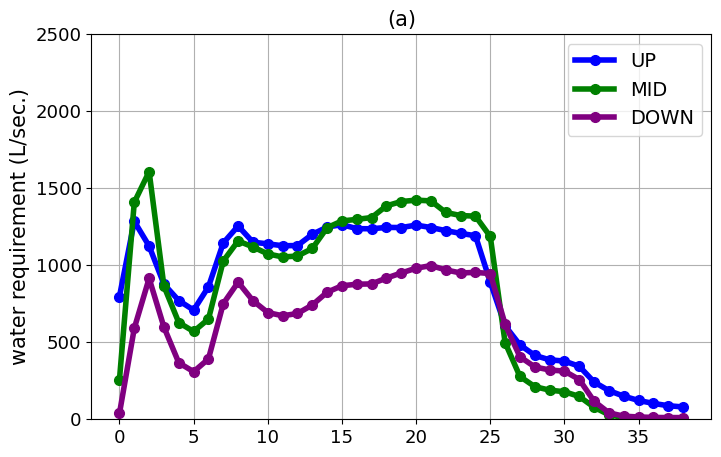

In [218]:
import matplotlib.pyplot as plt
#栽培必要水量
umd_path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\water_req_combined.csv"
umd = pd.read_csv(umd_path)
fig, ax = plt.subplots()
umd.plot(ax=ax, figsize=(8,5), color=["b","g","purple"], marker="o", markersize=7, linewidth=4)
ax.set_ylabel("water requirement (L/sec.)", fontsize=15)
ax.set_title("(a)", fontsize=15)
#day=["4/9","4/29","5/19","6/8","6/28","7/18","8/7","8/27"]
#xax=[0,4,8,12,16,20,24,28]
#ax.set_xticks(xax)
ax.set_ylim(0,2500)
#ax.set_xticklabels(day, rotation=45)
ax.tick_params(labelsize=13)
ax.grid()
ax.legend(fontsize=14)
#plt.savefig("/Users/moritakayuki/Desktop/jupyter_notebook/water_req.jpeg", dpi=800)